In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import wilcoxon

sns.set_style("whitegrid")

## Check controls: in-vitro array, and naked plasmid

#### This plasmid contains a part of the sequence of the ARS305 locus

In [51]:
ls controls/

DIES6_ALL_REP1_in_vitro_nucl_array.txt
DIES6_ALL_REP1_naked_plasmid.txt
DIES6_REP2_780READS_in_vitro_nucl_array.txt
DIES6_rep2_780READS_naked_plasmid.txt
array_disw2_rep1_780READS_noNA.csv
array_disw2_rep2_780READS_noNA.csv
array_disw2_rep2_780READS_noNA_cleaned.csv
in_vitro_nucl_array_(31 .. 2214).fa
mat_Megalodon_repII_in_vitro_nucl_array.txt
naked_plasmid.fa
naked_plasmid_disw2_rep1_780READS.csv
naked_plasmid_disw2_rep2_clean_780_reads.csv
naked_plasmid_wt_rep2_1000reads.txt
unused_csvs/
wt_mat_Megalodon_repIII_in_vitro_nucl_array.txt
wt_mat_Megalodon_repIII_naked_plasmid.txt


In [52]:
wt_rep3_nucarray = np.loadtxt("controls/wt_mat_Megalodon_repIII_in_vitro_nucl_array.txt")
wt_rep3_nucarray.shape

(780, 1966)

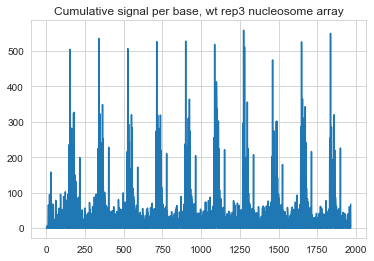

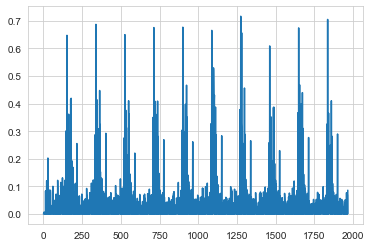

In [53]:
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), y = np.cumsum(wt_rep3_nucarray, axis = 0)[779,:])
plt.title("Cumulative signal per base, wt rep3 nucleosome array")
plt.show()
#the last line of the array contains the cumulative occupation per base

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), y = np.mean(wt_rep3_nucarray, axis = 0))
plt.show()

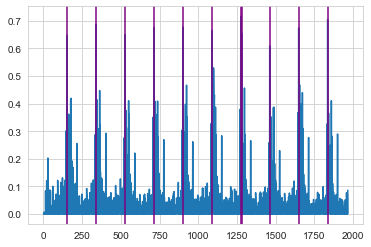

In [54]:
peaks = np.where(np.mean(wt_rep3_nucarray, axis = 0) >0.6)

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), y = np.mean(wt_rep3_nucarray, axis = 0))
for position in peaks[0]:
    plt.axvline(position, color = "purple")
plt.show()

In [55]:
np.gradient(peaks[0]).mean()

170.0

Text(0.5, 1.0, 'wt rep nuc array')

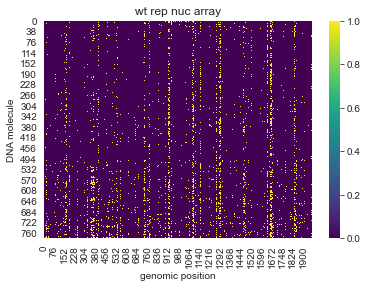

In [56]:
#heatmap of the wt raw data
sns.heatmap(wt_rep3_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt rep nuc array")

### Test differrent window sizes for smoothing

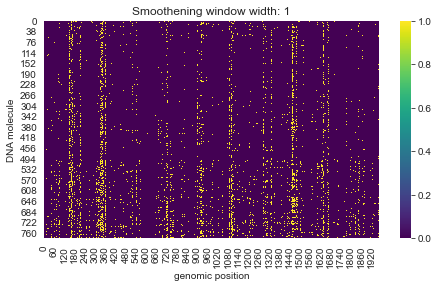

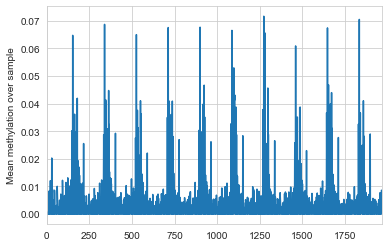

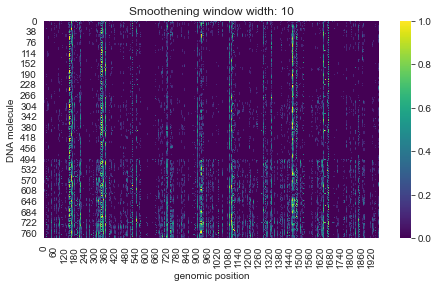

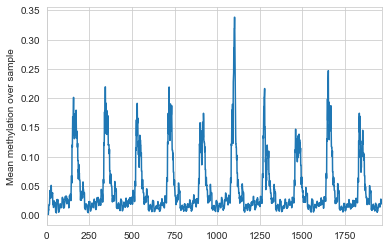

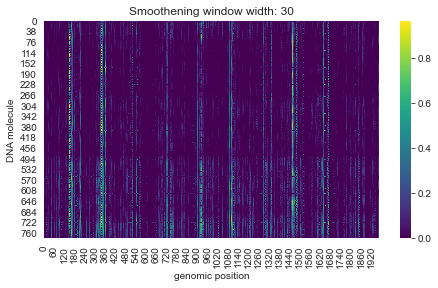

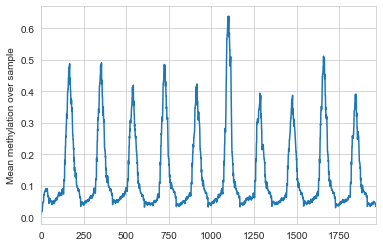

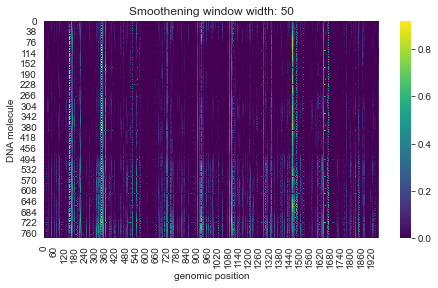

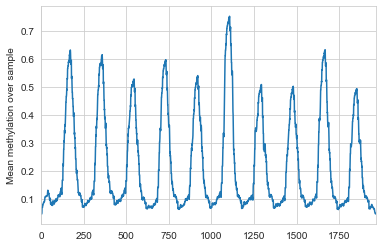

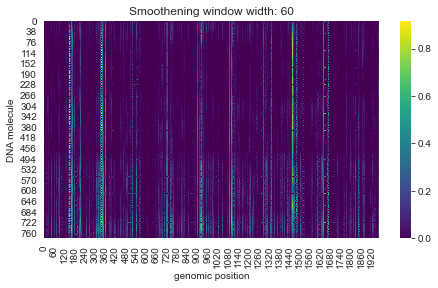

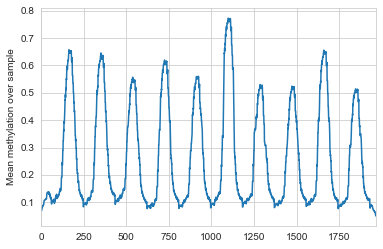

In [57]:
#calculate a sliding mean for each molecule
np.convolve(wt_rep3_nucarray[0,:], np.ones(10)/10, mode='same').shape

#N = 20 #smoothening window

#def smooth(array):
 #   return np.convolve(array, np.ones(N)/N, mode = "same")

for N in [1, 10, 30, 50, 60]:
    
    def smooth(array):
        return np.convolve(array, np.ones(N)/N, mode = "same")
    
    wt_nucarray_smooth = np.apply_along_axis(smooth, 0, wt_rep3_nucarray)
    
    plt.figure(figsize=(7.5,4))
    sns.heatmap(wt_nucarray_smooth, cmap = "viridis")
    plt.xlabel("genomic position")
    plt.ylabel("DNA molecule")
    plt.xlim(0, 1966)
    plt.title("Smoothening window width: " + str(N))
    plt.show()

    sns.lineplot(x = range(wt_nucarray_smooth.shape[1]), 
                 y = np.convolve(wt_nucarray_smooth.mean(axis = 0), np.ones(N)/10, mode ="same")
                )
    plt.ylabel("Mean methylation over sample")
    plt.xlim(0, 1966)
    plt.show()

In [58]:
# load the other replicate, and the counts from the mutants:

wt_rep2_nucarray = np.loadtxt("controls/mat_Megalodon_repII_in_vitro_nucl_array.txt")

dies6_rep1_nucarray = np.loadtxt("controls/DIES6_ALL_REP1_in_vitro_nucl_array.txt")
dies6_rep2_nucarray = np.loadtxt("controls/DIES6_REP2_780READS_in_vitro_nucl_array.txt")

disw2_rep1_nucarray = np.genfromtxt("controls/array_disw2_rep1_780READS_noNA.csv",
                                   dtype = int, delimiter = ",")

#disw2_rep2_nucarray = np.genfromtxt("controls/array_disw2_rep2_780READS_noNA.csv",
#                                   dtype = int, delimiter = ",")
#delete the first three columns as they come from linker DNA 
#disw2_rep2_nucarray_trimmed = disw2_rep2_nucarray[:, 30:]
#np.savetxt("controls/array_disw2_rep2_780READS_noNA_cleaned.csv", disw2_rep2_nucarray_trimmed)#

disw2_rep2_nucarray = np.loadtxt("controls/array_disw2_rep2_780READS_noNA_cleaned.csv")

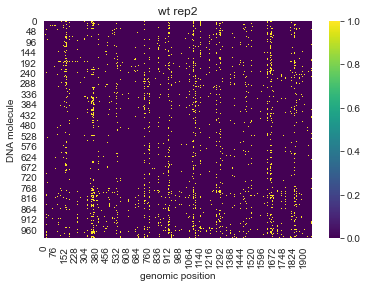

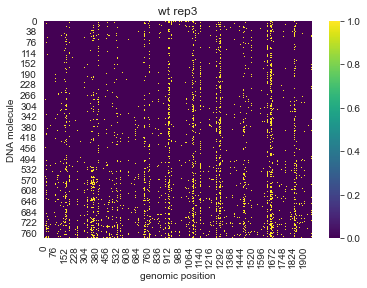

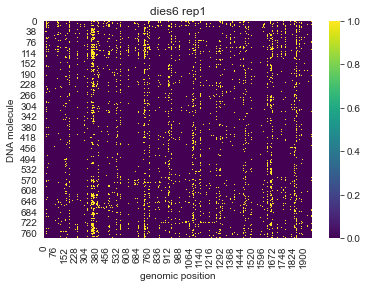

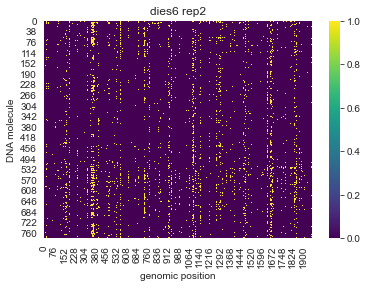

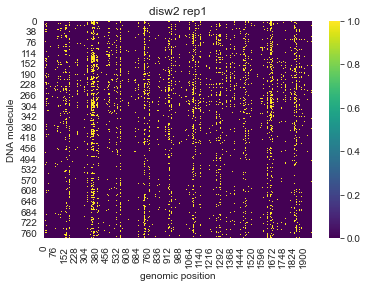

Text(0.5, 1.0, 'disw2 rep2')

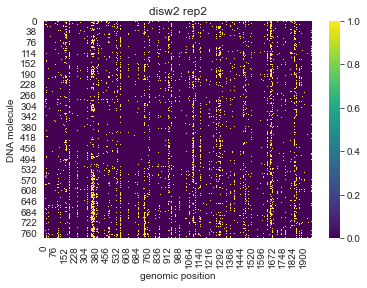

In [59]:
sns.heatmap(wt_rep2_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt rep2")
plt.show()

sns.heatmap(wt_rep3_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt rep3")
plt.show()

sns.heatmap(dies6_rep1_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("dies6 rep1")
plt.show()

sns.heatmap(dies6_rep2_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("dies6 rep2")
plt.show()

sns.heatmap(disw2_rep1_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("disw2 rep1")
plt.show()

sns.heatmap(disw2_rep2_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("disw2 rep2")

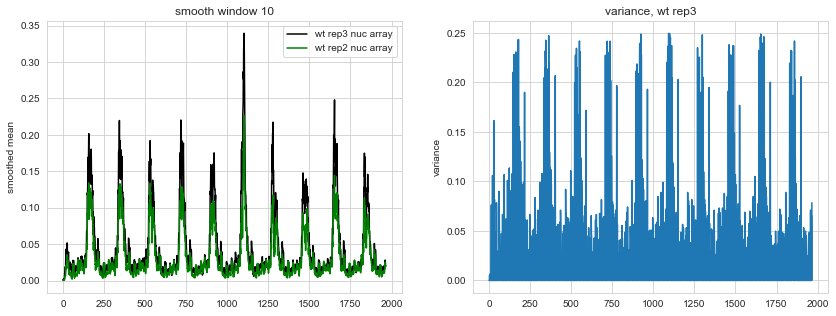

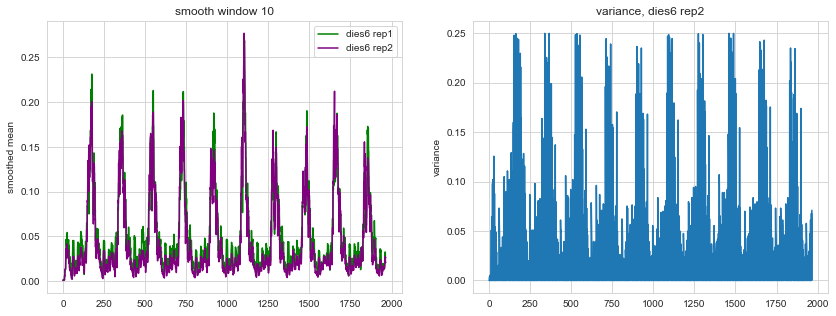

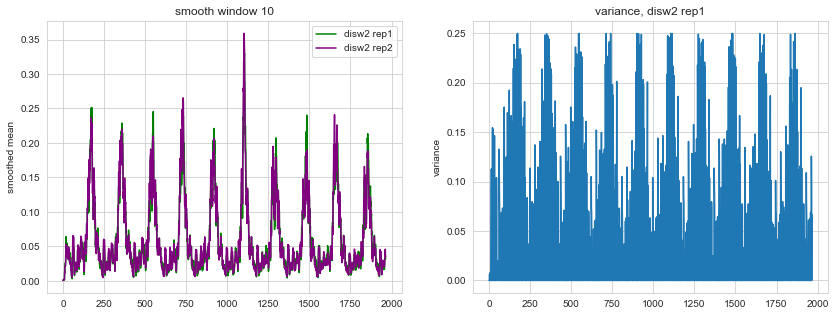

wt:  3.6679572617529154e-102
dies6:  5.234857328878377e-57
disw2:  0.02275886341794949


In [60]:
### compare replicates smoothed mean and varinace of wildtype, dies6 and disw2

smooth = 10

#wildtype
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(wt_rep3_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "black", label = "wt rep3 nuc array", ax = ax1)
sns.lineplot(x = range(wt_rep2_nucarray.shape[1]), 
                 y = np.convolve(wt_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "green", label = "wt rep2 nuc array", ax = ax1)
ax1.set_ylabel("smoothed mean")
ax1.set_title("smooth window " + str(smooth))

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = wt_rep3_nucarray.std(axis = 0)**2, ax = ax2)
plt.ylabel("variance")
ax2.set_title("variance, wt rep3")
plt.show()

#DIES6
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(dies6_rep1_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "green", label = "dies6 rep1", ax = ax1)
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(dies6_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "purple", label = "dies6 rep2", ax = ax1)
ax1.set_ylabel("smoothed mean")
ax1.set_title("smooth window " + str(smooth))

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = dies6_rep2_nucarray.std(axis = 0)**2, ax = ax2)
plt.ylabel("variance")
ax2.set_title("variance, dies6 rep2")
plt.show()

#DISW2
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(disw2_rep1_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "green", label = "disw2 rep1", ax = ax1)
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(disw2_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "purple", label = "disw2 rep2", ax = ax1)
ax1.set_ylabel("smoothed mean")
ax1.set_title("smooth window " + str(smooth))

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = disw2_rep1_nucarray.std(axis = 0)**2, ax = ax2)
plt.ylabel("variance")
ax2.set_title("variance, disw2 rep1")
plt.show()

print("wt: ", wilcoxon(wt_rep3_nucarray.mean(axis = 0), wt_rep2_nucarray.mean(axis =0), 
               alternative ="two-sided").pvalue)
print("dies6: ", wilcoxon(dies6_rep1_nucarray.mean(axis = 0), dies6_rep2_nucarray.mean(axis =0), 
               alternative ="two-sided").pvalue)
print("disw2: ", wilcoxon(disw2_rep1_nucarray.mean(axis = 0), disw2_rep2_nucarray.mean(axis =0), 
               alternative ="two-sided").pvalue)

In [61]:
wt_rep3_smooth_mean = np.convolve(wt_rep3_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
wt_rep2_smooth_mean = np.convolve(wt_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
dies6_rep1_smooth_mean = np.convolve(dies6_rep1_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
dies6_rep2_smooth_mean = np.convolve(dies6_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")

means_nucarray = np.concatenate((wt_rep3_smooth_mean.reshape(1, 1966),
                                 wt_rep2_smooth_mean.reshape(1, 1966),
                              dies6_rep1_smooth_mean.reshape(1, 1966),
                              dies6_rep2_smooth_mean.reshape(1, 1966)),
                              axis = 0)

w, p = wilcoxon(means_nucarray[2,:], means_nucarray[3,:], alternative = "two-sided")
print("Comparing dies6 replicates after smoothing: ", w,p)

#the statistical test shows that the replicates of the mutants are rather different: 
w_2, p_2 = wilcoxon(dies6_rep1_nucarray.mean(axis = 0), 
                    dies6_rep2_nucarray.mean(axis = 0), alternative = "two-sided") #p-value 5.23 * e-57
print("comparing dies6 replicates: ", w_2, p_2)

#disw2 replicates pass the statistical test for being similar:
w_3, p_3 = wilcoxon(disw2_rep1_nucarray.mean(axis = 0), 
                    disw2_rep2_nucarray.mean(axis = 0), alternative = "two-sided")
print(w_3, p_3)

#disw2 replicates pass the statistical test for being similar:
w_4, p_4 = wilcoxon(wt_rep3_nucarray.mean(axis = 0), 
                    wt_rep2_nucarray.mean(axis = 0), alternative = "two-sided")
print("Comparing wild-type replictes: ", w_4, p_4)

Comparing dies6 replicates after smoothing:  240845.0 5.311775211271692e-182
comparing dies6 replicates:  83049.0 5.234857328878377e-57
193039.5 0.02275886341794949
Comparing wild-type replictes:  44512.0 3.6679572617529154e-102


## Check the negative control: "naked plasmid" 
#### purified plasmid was added after locus purification. should have ~uniform methylation

In [62]:
ls controls/

DIES6_ALL_REP1_in_vitro_nucl_array.txt
DIES6_ALL_REP1_naked_plasmid.txt
DIES6_REP2_780READS_in_vitro_nucl_array.txt
DIES6_rep2_780READS_naked_plasmid.txt
array_disw2_rep1_780READS_noNA.csv
array_disw2_rep2_780READS_noNA.csv
array_disw2_rep2_780READS_noNA_cleaned.csv
in_vitro_nucl_array_(31 .. 2214).fa
mat_Megalodon_repII_in_vitro_nucl_array.txt
naked_plasmid.fa
naked_plasmid_disw2_rep1_780READS.csv
naked_plasmid_disw2_rep2_clean_780_reads.csv
naked_plasmid_wt_rep2_1000reads.txt
unused_csvs/
wt_mat_Megalodon_repIII_in_vitro_nucl_array.txt
wt_mat_Megalodon_repIII_naked_plasmid.txt


In [63]:
wt_rep3_naked_plasmid = np.loadtxt("controls/wt_mat_Megalodon_repIII_naked_plasmid.txt")
#wt_rep2_naked_plasmid = np.loadtxt("controls/mat_Megalodon_repII_naked_plasmid.txt")

In [64]:
set(wt_rep3_naked_plasmid.flatten())
np.isnan(wt_rep3_naked_plasmid).sum()

wt_rep3_naked_plasmid.mean(axis = 0)

array([0.        , 0.        , 0.67820513, ..., 0.00769231, 0.00384615,
       0.02435897])

In [65]:
def entropy(labels, base=None):
    base = math.e if base is None else base
    _ ,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()

    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

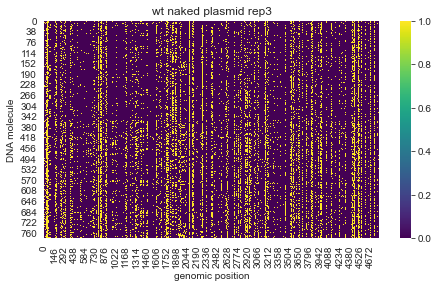

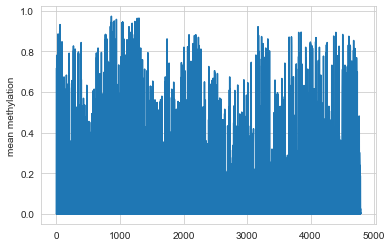

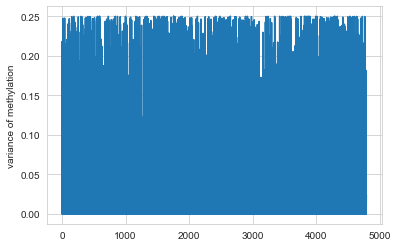

<AxesSubplot:title={'center':'naked plasmid wt rep3, entropy per position'}, ylabel='entropy'>

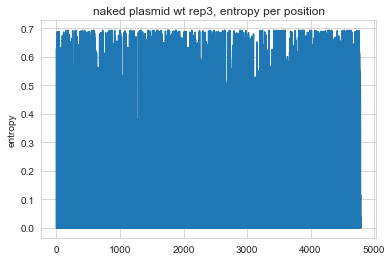

In [66]:
plt.figure(figsize=(7.5,4))
sns.heatmap(wt_rep3_naked_plasmid, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt naked plasmid rep3")
plt.show()

sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
             y = wt_rep3_naked_plasmid.mean(axis = 0))
plt.ylabel("mean methylation")
plt.show()

sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
             y = wt_rep3_naked_plasmid.std(axis = 0)**2)
plt.ylabel("variance of methylation")
plt.show()

g = sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep3_naked_plasmid))
g.set_ylabel("entropy")
g.set_title("naked plasmid wt rep3, entropy per position")
#g.set_xticks(range(0, ARS305_wt.shape[1], 50))
g

<AxesSubplot:title={'center':'nucarray wt rep3, entropy per position'}, ylabel='entropy'>

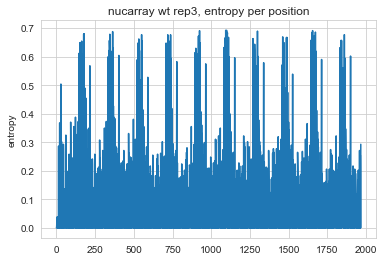

In [67]:
g = sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep3_nucarray))
g.set_ylabel("entropy")
g.set_title("nucarray wt rep3, entropy per position")
g

In [73]:
## How do the mutants change the variability of methylation for the "naked plasmid" ?
wt_rep2_naked_plasmid = np.loadtxt("controls/naked_plasmid_wt_rep2_1000reads.txt")

dies6_rep1_naked = np.loadtxt("controls/DIES6_ALL_REP1_naked_plasmid.txt")
dies6_rep2_naked = np.loadtxt("controls/DIES6_rep2_780READS_naked_plasmid.txt")

disw2_rep1_naked = np.loadtxt("controls/naked_plasmid_disw2_rep1_clean_780READS.csv")
disw2_rep2_naked = np.loadtxt("controls/naked_plasmid_disw2_rep2_clean_780_reads.csv")

Text(0.5, 1.0, 'naked plasmid wt rep2, entropy per position')

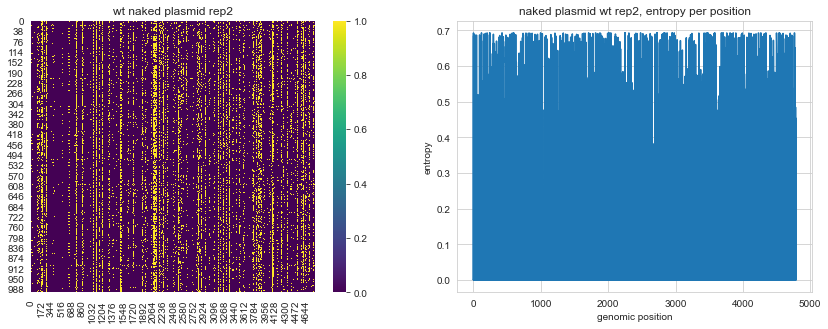

In [74]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))

sns.heatmap(wt_rep2_naked_plasmid, cmap = "viridis", ax =ax1)
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
ax1.set_title("wt naked plasmid rep2")

sns.set_style("whitegrid")
sns.lineplot(x = range(wt_rep2_naked_plasmid.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep2_naked_plasmid), ax = ax2)
plt.ylabel("entropy")
ax2.set_title("naked plasmid wt rep2, entropy per position")


<AxesSubplot:title={'center':'naked plasmid disw2 rep1, entropy per position'}, ylabel='entropy'>

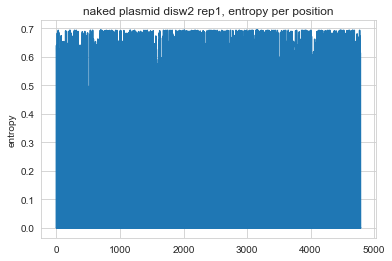

In [75]:
g = sns.lineplot(x = range(disw2_rep1_naked.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, disw2_rep1_naked))
g.set_ylabel("entropy")
g.set_title("naked plasmid disw2 rep1, entropy per position")
g

## Read in samples for origin ARS305 to set up the annotation of the nucleosome areas

## Wildtype

In [76]:
ARS305_wt = np.loadtxt("ARS305/wt_mat_Megalodon_repIII_ARS305_end_LexA.txt")

#replicate 2
ARS305_wt_rep2 = np.genfromtxt("ARS305/ARS305_wt_REP2_noNA.csv", dtype = int, delimiter = ",")
#feature annotation
ARS305_anno = pd.read_csv("ARS305/Features_from ARS305_end_LexA _(31 .. 1124).txt", sep  = "\t", 
                          header = None, index_col = 0)
ARS305_anno.columns = ["position", "length"]
ARS305_anno.index = ARS305_anno.index.astype("string")
ARS305_anno.index = ARS305_anno.index.str.strip()

ARS305_anno["pos_start"] = ARS305_anno.position.str.split(".").str[0].astype(int) -1
ARS305_anno["pos_stop"] = ARS305_anno.position.str.split(".").str[2].astype(int) -1

In [77]:
#ARS305_wt_rep2.drop(index = ARS305_wt_rep2.index[700:722], inplace =True)

In [78]:
ARS305_anno #.loc["ARS305", "pos_start"]

,position,length,pos_start,pos_stop
0,,,,
NS-3,63..156,94,62,155
L-2,157..218,62,156,217
NS-2,219..365,147,218,364
L-1,366..378,13,365,377
NS-1,379..525,147,378,524
ARS305,543..630,88,542,629
NS+1,646..792,147,645,791
L+1,793..836,44,792,835
NS+2,837..983,147,836,982


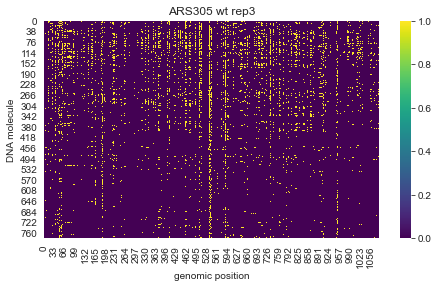

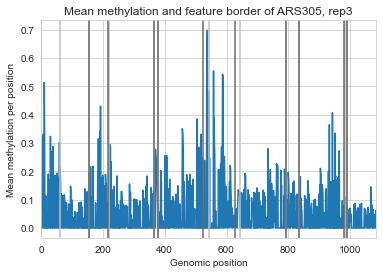

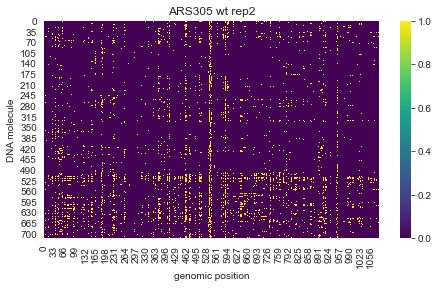

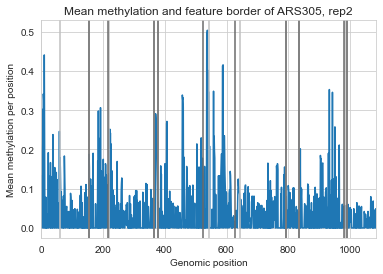

In [79]:
#plot the raw data:
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 1084)
plt.title("ARS305 wt rep3")
plt.show()

#and the bulk data:
sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = ARS305_wt.mean(axis = 0)
                )
plt.xlabel("Genomic position")
plt.ylabel("Mean methylation per position")
plt.title("Mean methylation and feature border of ARS305, rep3")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
plt.show()

#wildtype replicate 2:
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt_rep2, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 1084)
plt.title("ARS305 wt rep2")
plt.show()

sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = ARS305_wt_rep2.mean(axis = 0)
                )
plt.xlabel("Genomic position")
plt.ylabel("Mean methylation per position")
plt.title("Mean methylation and feature border of ARS305, rep2")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
plt.show()

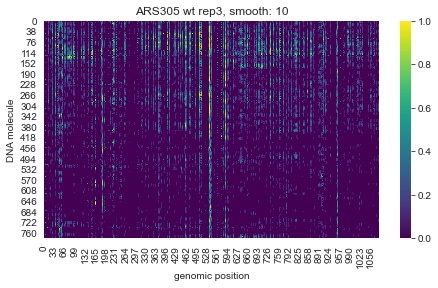

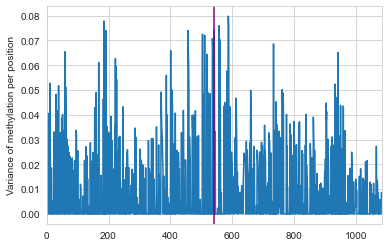

In [80]:
smooth_window = 10

def smooth(array):
        return np.convolve(array, np.ones(smooth_window)/smooth_window, mode = "same")
    
ARS305_wt_smooth = np.apply_along_axis(smooth, 0, ARS305_wt)
    
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt_smooth, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 1084)
plt.title("ARS305 wt rep3, smooth: " + str(smooth_window))
plt.show()

sns.lineplot(x = range(ARS305_wt_smooth.shape[1]), 
                 y = ARS305_wt_smooth.std(axis = 0)**2
                )
plt.ylabel("Variance of methylation per position")
plt.xlim(0, 1084)
plt.axvline(ARS305_anno.loc["ARS305", "pos_start"], color = "purple")
plt.show()

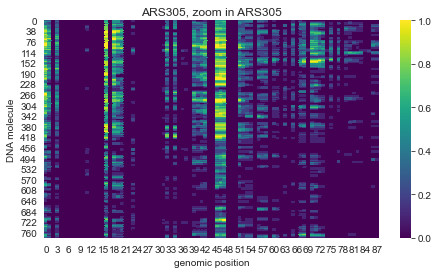

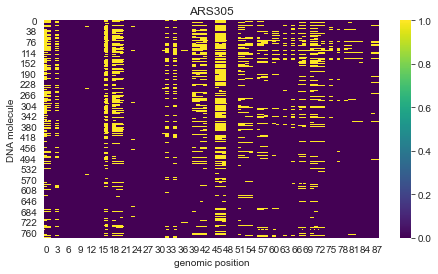

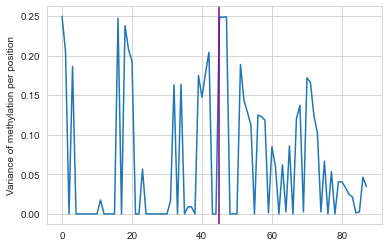

In [81]:
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt_smooth[:, 542:630], cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 630-542)
plt.title("ARS305, zoom in ARS305")
plt.show()

plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt[:, 542:630], cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 630-542)
plt.title("ARS305")
plt.show()

sns.lineplot(x = range(630-542), 
                 y = ARS305_wt[:, 542:630].std(axis = 0)**2
                )
plt.axvline(45, color = "purple")
plt.ylabel("Variance of methylation per position")
plt.show()

#sns.lineplot(x = range(630-542), 
#                 y = ARS305_wt[:, 542:630].cumsum(axis = 0)[779, :]/779
#            )
#plt.axvline(45, color = "purple")
#plt.ylabel("Percent methylated")
#plt.show()

In [114]:
#this computes the percent of methylation at a specific base

#sns.lineplot(x = range(ARS305_wt.shape[1]), 
#             y = ARS305_wt[779,:].cumsum(axis = 0)/780)
ARS305_wt[779,:].cumsum(axis = 0)/780

array([0.00128205, 0.00128205, 0.00128205, ..., 0.07564103, 0.07564103,
       0.07564103])

<AxesSubplot:>

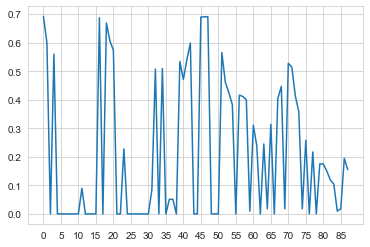

In [82]:
#as a measure for the heterogeneity, try the entropy:
# alternatively, try: from scipy.stats import entropy
import math

def entropy(labels, base=None):
    base = math.e if base is None else base
    _ ,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()

    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

#https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python

#entropy(ARS305_wt[:,6])
#np.unique(ARS305_wt[:,6], return_counts = True)

g = sns.lineplot(x = range(630-542), y = np.apply_along_axis(entropy, 0, ARS305_wt[:, 542:630]))
g.set_xticks(range(0, 630-542, 5))
g

<AxesSubplot:title={'center':'ARS305 wt rep3, entropy per position'}, ylabel='entropy'>

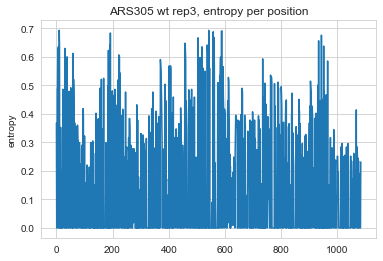

In [83]:
g = sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, ARS305_wt))
g.set_ylabel("entropy")
g.set_title("ARS305 wt rep3, entropy per position")
#g.set_xticks(range(0, ARS305_wt.shape[1], 50))
g

In [84]:
entropy_ARS305_wt = np.apply_along_axis(entropy, 0, ARS305_wt)
entropy_ARS305_wt.min(), entropy_ARS305_wt.max(), np.count_nonzero(entropy_ARS305_wt)

(-0.0, 0.6928184134311288, 545)

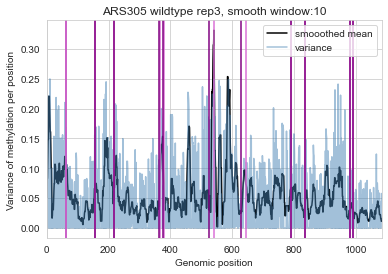

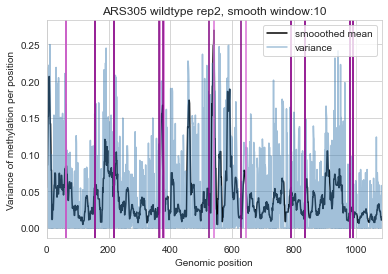

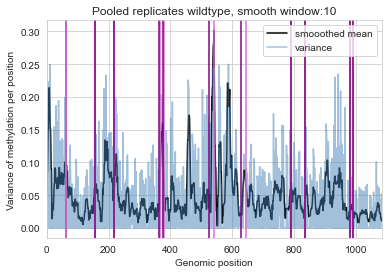

In [134]:
N = 10

sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = np.convolve(ARS305_wt.mean(axis = 0), np.ones(N)/N, mode ="same"),
             color = "black", label = "smooothed mean")
#plt.ylabel("Mean methylation over sample")
plt.xlim(0, ARS305_wt_smooth.shape[1])
plt.title("ARS305 wildtype rep3, smooth window:" + str(N))


sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = ARS305_wt.std(axis = 0)**2, color = "steelblue", alpha = 0.5,
            label = "variance"
            )
plt.ylabel("Variance of methylation per position")
plt.xlabel("Genomic position")
plt.axvline(62, color = "purple", label = "border")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "orchid")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "purple")
plt.show()
    
# Compare that the other replicate
sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = np.convolve(ARS305_wt_rep2.mean(axis = 0), np.ones(N)/N, mode ="same"),
             color = "black", label = "smooothed mean")
#plt.ylabel("Mean methylation over sample")
plt.xlim(0, ARS305_wt_smooth.shape[1])
plt.title("ARS305 wildtype rep2, smooth window:" + str(N))
sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = ARS305_wt.std(axis = 0)**2, color = "steelblue", alpha = 0.5,
            label = "variance"
            )
plt.ylabel("Variance of methylation per position")
plt.xlabel("Genomic position")
plt.axvline(62, color = "purple", label = "border")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "orchid")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "purple")
plt.show()
    
# Concatenate the wildtype replicates and plot the mean and the variance again:

joined_wt = np.concatenate((ARS305_wt, ARS305_wt_rep2), axis = 0)

sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(joined_wt.mean(axis = 0), np.ones(N)/N, mode ="same"),
             color = "black", label = "smooothed mean")
#plt.ylabel("Mean methylation over sample")
plt.xlim(0, joined_wt.shape[1])
plt.title("Pooled replicates wildtype, smooth window:" + str(N))


sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = joined_wt.std(axis = 0)**2, color = "steelblue", alpha = 0.5,
            label = "variance"
            )
plt.ylabel("Variance of methylation per position")
plt.xlabel("Genomic position")
plt.axvline(62, color = "purple", label = "border")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "orchid")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "purple")
plt.show()

## Load data for mutant dies6

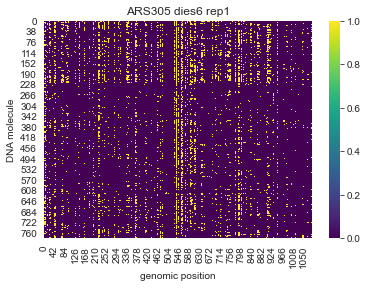

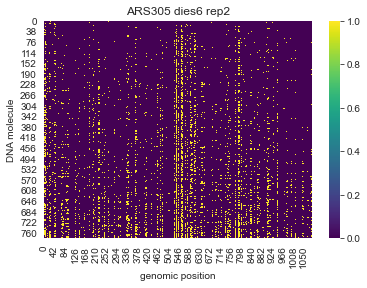

In [86]:
ARS305_dies6_rep1 = np.loadtxt("ARS305/DIES6_ALL_REP1_ARS305_end_LexA.txt")
ARS305_dies6_rep1.shape

sns.heatmap(ARS305_dies6_rep1, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, ARS305_dies6_rep1.shape[1])
plt.title("ARS305 dies6 rep1")
plt.show()

ARS305_dies6_rep2 = np.genfromtxt("ARS305/DIES6_ARS305_REP2_780READS.csv", dtype = int, delimiter = ",")
ARS305_dies6_rep2.shape

sns.heatmap(ARS305_dies6_rep2, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, ARS305_dies6_rep2.shape[1])
plt.title("ARS305 dies6 rep2")
plt.show()

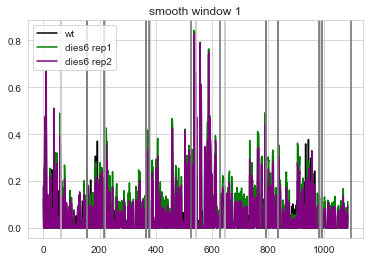

(28113.0, 2.615838000341427e-36)

In [144]:
smooth = 1

sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(joined_wt.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(ARS305_dies6_rep1.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "green", label = "dies6 rep1")
sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(ARS305_dies6_rep2.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "purple", label = "dies6 rep2")
plt.title("smooth window " + str(smooth))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

ARS305_wt_smooth_mean = np.convolve(joined_wt.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
ARS305_dies6_rep1_smooth_mean = np.convolve(ARS305_dies6_rep1.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
ARS305_dies6_rep2_smooth_mean = np.convolve(ARS305_dies6_rep2.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")

means_ARS305 = np.concatenate((ARS305_wt_smooth_mean.reshape(1, 1084), 
                              ARS305_dies6_rep1_smooth_mean.reshape(1, 1084),
                              ARS305_dies6_rep2_smooth_mean.reshape(1, 1084)),
                              axis = 0)

from scipy.stats import wilcoxon

w, p = wilcoxon(means_ARS305[0,:], means_ARS305[1,:], alternative = "two-sided")
w,p

In [145]:
#the statistical test shows that the replicates of the mutants are rather different: 
wilcoxon(ARS305_dies6_rep1.mean(axis = 0), 
         ARS305_dies6_rep2.mean(axis = 0), alternative = "two-sided")

WilcoxonResult(statistic=12954.0, pvalue=1.627377475716176e-58)

## Load data for mutant disw2

(780, 1084)


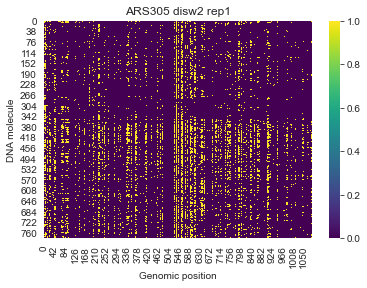

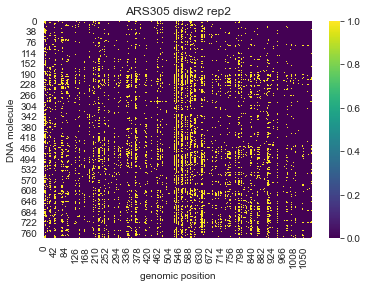

In [146]:
ARS305_disw2_rep1 = np.genfromtxt("ARS305/ARS305_disw2_rep1_780READS_noNA.csv", dtype = int,
                                 delimiter = ",")
print(ARS305_disw2_rep1.shape)

sns.heatmap(ARS305_disw2_rep1, cmap = "viridis")
plt.xlabel("Genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, ARS305_disw2_rep1.shape[1])
plt.title("ARS305 disw2 rep1")
plt.show()

ARS305_disw2_rep2 = np.genfromtxt("ARS305/ARS305_disw2_rep2_780READS_noNA.csv", dtype = int, delimiter = ",")
ARS305_disw2_rep2.shape

sns.heatmap(ARS305_disw2_rep2, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, ARS305_disw2_rep2.shape[1])
plt.title("ARS305 disw2 rep2")
plt.show()

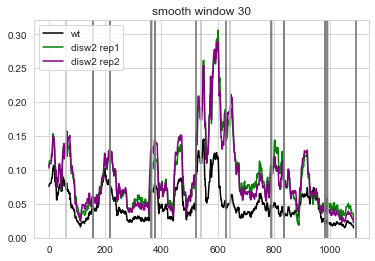

In [147]:
smooth_width = 30

sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(joined_wt.mean(axis = 0), np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(ARS305_disw2_rep1.mean(axis = 0), np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "green", label = "disw2 rep1")
sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(ARS305_disw2_rep2.mean(axis = 0), np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "purple", label = "disw2 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

In [148]:
# calculate the mean over all molecules and smooth with window size "smooth"

ARS305_disw2_rep1_smooth_mean = np.convolve(ARS305_disw2_rep1.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
ARS305_disw2_rep2_smooth_mean = np.convolve(ARS305_disw2_rep2.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")

means_ARS305 = np.concatenate((means_ARS305, 
                              ARS305_disw2_rep1_smooth_mean.reshape(1, 1084),
                              ARS305_disw2_rep2_smooth_mean.reshape(1, 1084)),
                              axis = 0)

w, p = wilcoxon(ARS305_disw2_rep1.mean(axis = 0),
                ARS305_disw2_rep2.mean(axis = 0), alternative = "two-sided")
w,p

(67976.5, 0.14291349241154117)

## Condense segment information for statistical testing of methylation per feature window

In [149]:
ARS305_segments = ARS305_anno.drop(columns = "position")

#list comprehension to catch the smoothed methylation values per sample in a cell per column
array_list = [ARS305_wt_smooth_mean[ARS305_segments.loc[index, "pos_start"]:ARS305_segments.loc[index, "pos_stop"]] for 
 index in ARS305_segments.index]

ARS305_segments["wt_smooth_mean"] = pd.Series(array_list, index = ARS305_segments.index)

#dies6 mutant 
array_list = [ARS305_dies6_rep1_smooth_mean[ARS305_segments.loc[index, "pos_start"]:ARS305_segments.loc[index, "pos_stop"]] for 
 index in ARS305_segments.index]
ARS305_segments["dies6_rep1_smooth_mean"] = pd.Series(array_list, index = ARS305_segments.index)

array_list = [ARS305_dies6_rep2_smooth_mean[ARS305_segments.loc[index, "pos_start"]:ARS305_segments.loc[index, "pos_stop"]] for 
 index in ARS305_segments.index]
ARS305_segments["dies6_rep2_smooth_mean"] = pd.Series(array_list, index = ARS305_segments.index)

#disw2 mutant

array_list = [ARS305_disw2_rep1_smooth_mean[ARS305_segments.loc[index, "pos_start"]:ARS305_segments.loc[index, "pos_stop"]] for 
 index in ARS305_segments.index]
ARS305_segments["disw2_rep1_smooth_mean"] = pd.Series(array_list, index = ARS305_segments.index)

array_list = [ARS305_disw2_rep2_smooth_mean[ARS305_segments.loc[index, "pos_start"]:ARS305_segments.loc[index, "pos_stop"]] for 
 index in ARS305_segments.index]
ARS305_segments["disw2_rep2_smooth_mean"] = pd.Series(array_list, index = ARS305_segments.index)

In [150]:
#this chunk doesn't work yet, it should catch the values per sample automatically from a list of samples
#samples = [ARS305_wt_smooth_mean, ARS305_dies6_rep1_smooth_mean, ARS305_dies6_rep2_smooth_mean]

#ARS305_segments = ARS305_anno.drop(columns = "position")

#for sample in samples:
#    temp_array_list = [samples[ARS305_segments.loc[index, "pos_start"]:ARS305_segments.loc[index, "pos_stop"]] for
#                  index in ARS305_segments.index]
#    #print(temp_array_list)
#    ARS305_segments[sample] = pd.Series(temp_array_list, index = ARS305_segments.index)   

In [151]:
#ARS305_segments.drop(index = ["L+2", "L-1"], inplace = True)

ARS305_segments["p_value_dies6_rep1"] = [wilcoxon(ARS305_segments.loc[index, "wt_smooth_mean"], 
                                                ARS305_segments.loc[index,"dies6_rep1_smooth_mean"],
                                                alternative = "two-sided").pvalue for index in ARS305_segments.index]

ARS305_segments["p_value_dies6_rep2"] = [wilcoxon(ARS305_segments.loc[index, "wt_smooth_mean"], 
                                                ARS305_segments.loc[index,"dies6_rep2_smooth_mean"],
                                                alternative = "two-sided").pvalue for index in ARS305_segments.index]

ARS305_segments["p_value_disw2_rep1"] = [wilcoxon(ARS305_segments.loc[index, "wt_smooth_mean"], 
                                                ARS305_segments.loc[index,"disw2_rep1_smooth_mean"],
                                                alternative = "two-sided").pvalue for index in ARS305_segments.index]

ARS305_segments["p_value_disw2_rep2"] = [wilcoxon(ARS305_segments.loc[index, "wt_smooth_mean"], 
                                                ARS305_segments.loc[index,"disw2_rep2_smooth_mean"],
                                                alternative = "two-sided").pvalue for index in ARS305_segments.index]

/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [152]:
print("           Overview of p-values for different mutants")
print("           Smoothing window: " + str(smooth))
print("           The linker regions L-1 and L+2 are too short for a reliable Wilcoxon-Test without smoothing")
ARS305_segments.drop(ARS305_segments.columns[3:8], axis =1)

           Overview of p-values for different mutants
           Smoothing window: 1
           The linker regions L-1 and L+2 are too short for a reliable Wilcoxon-Test without smoothing


,length,pos_start,pos_stop,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
NS-3,94,62,155,2.443169e-05,5.985829e-04,1.840909e-06,2.083141e-06
L-2,62,156,217,8.288020e-01,9.590574e-02,6.767564e-02,1.025633e-01
NS-2,147,218,364,2.968904e-07,1.938391e-01,2.091954e-07,2.950776e-09
L-1,13,365,377,1.729028e-02,1.729028e-02,1.729028e-02,1.729028e-02
NS-1,147,378,524,2.214751e-05,5.163708e-02,1.290846e-05,6.643896e-07
ARS305,88,542,629,9.614824e-09,3.412277e-08,1.191557e-08,1.245193e-09
NS+1,147,645,791,3.656656e-10,1.009407e-06,2.785376e-10,2.569303e-11
L+1,44,792,835,3.377036e-03,6.165452e-03,7.656103e-03,9.842731e-06
NS+2,147,836,982,1.974032e-03,2.136371e-01,2.609043e-03,4.520948e-06


In [153]:
pvalue = 2.5e-5

test = ARS305_segments.drop(ARS305_segments.columns[3:8], axis =1)

print("       Which sites have a different mean methylation for the disw2 mutatant?")
print("       P-value below: ", pvalue)
test.loc[(test["p_value_disw2_rep1"] < pvalue) & 
         (test["p_value_disw2_rep2"] < pvalue)]

       Which sites have a different mean methylation for the disw2 mutatant?
       P-value below:  2.5e-05


,length,pos_start,pos_stop,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
NS-3,94,62,155,2.443169e-05,5.985829e-04,1.840909e-06,2.083141e-06
NS-2,147,218,364,2.968904e-07,1.938391e-01,2.091954e-07,2.950776e-09
NS-1,147,378,524,2.214751e-05,5.163708e-02,1.290846e-05,6.643896e-07
ARS305,88,542,629,9.614824e-09,3.412277e-08,1.191557e-08,1.245193e-09
NS+1,147,645,791,3.656656e-10,1.009407e-06,2.785376e-10,2.569303e-11


In [154]:
print("       Which sites have a different mean methylation for the dies6 mutatant?")
print("       P-value below: ", pvalue)

test.loc[(test["p_value_dies6_rep1"] < pvalue)& 
         (test["p_value_dies6_rep2"] < pvalue)]

       Which sites have a different mean methylation for the dies6 mutatant?
       P-value below:  2.5e-05


,length,pos_start,pos_stop,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
ARS305,88,542,629,9.614824e-09,3.412277e-08,1.191557e-08,1.245193e-09
NS+1,147,645,791,3.656656e-10,1.009407e-06,2.785376e-10,2.569303e-11


In [155]:
#Repeat this test for the case that methylation in one fragment is higher than in wildtype:
test_higher = ARS305_segments.iloc[:, :8]
test_higher["p_value_dies6_rep1"] = [wilcoxon(test_higher.loc[index, "wt_smooth_mean"], 
                                           test_higher.loc[index,"dies6_rep1_smooth_mean"],
                                                alternative = "less").pvalue for index in test_higher.index]

test_higher["p_value_dies6_rep2"] = [wilcoxon(test_higher.loc[index, "wt_smooth_mean"], 
                                           test_higher.loc[index,"dies6_rep2_smooth_mean"],
                                                alternative = "less").pvalue for index in test_higher.index]

test_higher["p_value_disw2_rep1"] = [wilcoxon(test_higher.loc[index, "wt_smooth_mean"], 
                                           test_higher.loc[index,"disw2_rep1_smooth_mean"],
                                                alternative = "less").pvalue for index in test_higher.index]

test_higher["p_value_disw2_rep2"] = [wilcoxon(test_higher.loc[index, "wt_smooth_mean"], 
                                           test_higher.loc[index,"disw2_rep2_smooth_mean"],
                                                alternative = "less").pvalue for index in test_higher.index]
test_higher.drop(test_higher.columns[3:8], axis =1, inplace = True)

/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [205]:
#Regions significant for disw2:
pvalue = 2.5e-2

print("       Which sites have a a higher mean methylation for the disw2 mutatant?")
print("       P-value below: ", pvalue)
test_higher.loc[(test_higher["p_value_disw2_rep1"] < pvalue) & 
         (test_higher["p_value_disw2_rep2"] < pvalue)]

       Which sites have a a higher mean methylation for the disw2 mutatant?
       P-value below:  0.025


,length,pos_start,pos_stop,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
NS-3,94,62,155,1.221585e-05,2.992915e-04,9.204544e-07,1.041570e-06
NS-2,147,218,364,1.484452e-07,9.691956e-02,1.045977e-07,1.475388e-09
L-1,13,365,377,8.645140e-03,8.645140e-03,8.645140e-03,8.645140e-03
NS-1,147,378,524,1.107375e-05,2.581854e-02,6.454230e-06,3.321948e-07
ARS305,88,542,629,4.807412e-09,1.706139e-08,5.957783e-09,6.225965e-10
NS+1,147,645,791,1.828328e-10,5.047037e-07,1.392688e-10,1.284652e-11
L+1,44,792,835,1.688518e-03,3.082726e-03,3.828051e-03,4.921365e-06
NS+2,147,836,982,9.870159e-04,1.068185e-01,1.304521e-03,2.260474e-06
NS+3,103,991,1093,2.185228e-03,3.961133e-02,6.606601e-04,4.956178e-06


In [204]:
#Regions significant for dies6:
pvalue = 2.5e-2

print("       Which sites have a a higher mean methylation for the dies6 mutatant?")
print("       P-value below: ", pvalue)
test_higher.loc[(test_higher["p_value_dies6_rep1"] < pvalue) & 
         (test_higher["p_value_dies6_rep2"] < pvalue)]

       Which sites have a a higher mean methylation for the dies6 mutatant?
       P-value below:  0.025


,length,pos_start,pos_stop,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
NS-3,94,62,155,1.221585e-05,2.992915e-04,9.204544e-07,1.041570e-06
L-1,13,365,377,8.645140e-03,8.645140e-03,8.645140e-03,8.645140e-03
ARS305,88,542,629,4.807412e-09,1.706139e-08,5.957783e-09,6.225965e-10
NS+1,147,645,791,1.828328e-10,5.047037e-07,1.392688e-10,1.284652e-11
L+1,44,792,835,1.688518e-03,3.082726e-03,3.828051e-03,4.921365e-06


## Normalize each experiment to maximum values, and pool replicates

In [232]:
#[Normalize pooled wt replicates to max values (the minimum is always 0 with this kind of data, 
# so this simplifies the normalization to max-scaling)]

###wt_min_max = joined_wt.mean(axis = 0)/joined_wt.mean(axis = 0).max()
# normalize the mean values of the mutants to the values of the wildtype
#dies6_min_max = joined_dies6.mean(axis = 0)/joined_dies6.mean(axis = 0).max()
#disw2_min_max = joined_disw2.mean(axis = 0)/joined_disw2.mean(axis = 0).max()

#pool the mutant replicates
#joined_dies6 = np.concatenate((ARS305_dies6_rep1, ARS305_dies6_rep2), axis = 0)
#joined_dies6.shape

#joined_disw2 = np.concatenate((ARS305_disw2_rep1, ARS305_disw2_rep2), axis = 0)
#joined_disw2.shape


wt_rep3_minmax = ARS305_wt.mean(axis = 0)/ARS305_wt.mean(axis = 0).max()
wt_rep2_minmax = ARS305_wt_rep2.mean(axis = 0)/ARS305_wt_rep2.mean(axis = 0).max()

pooled_wt = np.concatenate((wt_rep3_minmax.reshape(1, -1), wt_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#dies6
dies6_rep1_minmax = ARS305_dies6_rep1.mean(axis = 0)/ARS305_dies6_rep1.mean(axis = 0).max()
dies6_rep2_minmax = ARS305_dies6_rep2.mean(axis = 0)/ARS305_dies6_rep2.mean(axis = 0).max()

pooled_dies6 = np.concatenate((dies6_rep1_minmax.reshape(1, -1), dies6_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#disw2
disw2_rep1_minmax = ARS305_disw2_rep1.mean(axis = 0)/ARS305_disw2_rep1.mean(axis = 0).max()
disw2_rep2_minmax = ARS305_disw2_rep2.mean(axis = 0)/ARS305_disw2_rep2.mean(axis = 0).max()

pooled_disw2 = np.concatenate((disw2_rep1_minmax.reshape(1, -1), disw2_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

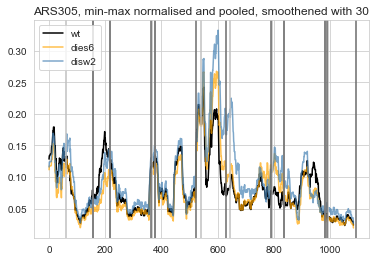

In [233]:
N=30

sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_wt, np.ones(N)/N, mode="same"), #wt_min_max
             color = "black", 
            label = "wt")
sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_dies6, np.ones(N)/N, mode="same"), #dies6_min_max
             color = "orange", alpha = 0.7,
            label = "dies6")
sns.lineplot(x = range(pooled_wt.shape[0]),
            y = np.convolve(pooled_disw2, np.ones(N)/N, mode = "same"), #disw2_min_max
            color = "steelblue", alpha = 0.7,
            label = "disw2")
plt.title("ARS305, min-max normalised and pooled, smoothened with " + str(N)) #pooled and min-max normalised
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")

Text(0.5, 1.0, 'Fold change between mutant and wildtype')

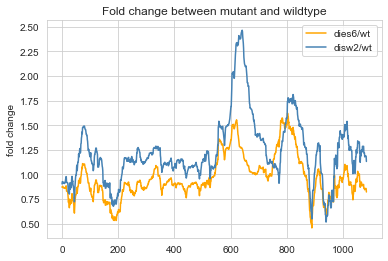

In [265]:
sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_dies6, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
            color = "orange", 
             label = "dies6/wt")
sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_disw2, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
            color = "steelblue",
             label = "disw2/wt")
plt.ylabel("fold change")
plt.title("Fold change between mutant and wildtype")


### Compare mean distributions between pooled replicates and wildtype with paired wilcoxon test

In [234]:
segments = ARS305_anno.drop(columns = "position")

#list comprehension to catch the pooled methylation values per sample in a cell per column
array_list = [pooled_wt[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["wt_mean"] = pd.Series(array_list, index = segments.index)

#dies6 mutant 
array_list = [pooled_dies6[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["dies6_mean"] = pd.Series(array_list, index = segments.index)

#disw2 mutant

array_list = [pooled_disw2[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["disw2_mean"] = pd.Series(array_list, index = segments.index)

In [235]:
segments["p_value_dies6"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"dies6_mean"],
                                                alternative = "two-sided").pvalue for index in segments.index]

segments["p_value_disw2"] = [wilcoxon(ARS305_segments.loc[index, "wt_smooth_mean"], 
                                                segments.loc[index,"disw2_mean"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments.drop(segments.columns[3:6], axis =1, inplace = True)

/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [236]:
#Regions significant for dies6:
pvalue = 2.5e-2

print("       Which sites have a different mean methylation in the dies6 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_dies6"] < pvalue)]

       Which sites have a different mean methylation in the dies6 mutant?
       P-value below:  0.025


,length,pos_start,pos_stop,p_value_dies6,p_value_disw2
0,,,,,
L-2,62,156,217,1.318121e-05,1.411853e-02
NS-2,147,218,364,8.898613e-04,2.091541e-09
NS-1,147,378,524,1.469803e-08,4.331224e-06
ARS305,88,542,629,1.046611e-07,4.255028e-09
NS+1,147,645,791,2.705507e-03,9.886133e-11
L+1,44,792,835,8.223576e-03,1.961882e-04


In [237]:
#Regions significant for disw2:
print("       Which sites have a different mean methylation in the disw2 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_disw2"] < pvalue)]

       Which sites have a different mean methylation in the disw2 mutant?
       P-value below:  0.025


,length,pos_start,pos_stop,p_value_dies6,p_value_disw2
0,,,,,
NS-3,94,62,155,7.309585e-01,1.265035e-06
L-2,62,156,217,1.318121e-05,1.411853e-02
NS-2,147,218,364,8.898613e-04,2.091541e-09
L-1,13,365,377,2.075784e-01,1.729028e-02
NS-1,147,378,524,1.469803e-08,4.331224e-06
ARS305,88,542,629,1.046611e-07,4.255028e-09
NS+1,147,645,791,2.705507e-03,9.886133e-11
L+1,44,792,835,8.223576e-03,1.961882e-04
NS+2,147,836,982,4.675679e-01,1.557713e-04


### Compare pooled wildtype to mutant replicates, then filter regions

In [245]:
segments = ARS305_anno.drop(columns = "position")

#list comprehension to catch the pooled methylation values per sample in a cell per column
array_list = [pooled_wt[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["wt_mean"] = pd.Series(array_list, index = segments.index)

#dies6 mutant 
array_list = [dies6_rep1_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_mean_rep1"] = pd.Series(array_list, index = segments.index)

array_list = [dies6_rep2_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_mean_rep2"] = pd.Series(array_list, index = segments.index)


#disw2 mutant
array_list = [disw2_rep1_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_mean_rep1"] = pd.Series(array_list, index = segments.index)

array_list = [disw2_rep2_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_mean_rep2"] = pd.Series(array_list, index = segments.index)

#perform statistical test
segments["p_value_dies6_rep1"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"dies6_mean_rep1"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments["p_value_dies6_rep2"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"dies6_mean_rep2"],
                                                alternative = "two-sided").pvalue for index in segments.index]

segments["p_value_disw2_rep1"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"disw2_mean_rep1"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments["p_value_disw2_rep2"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"disw2_mean_rep2"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments.drop(segments.columns[3:8], axis =1, inplace = True)

/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [246]:
segments

,length,pos_start,pos_stop,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
NS-3,94,62,155,7.478641e-02,1.094357e-02,2.311129e-04,1.477256e-04
L-2,62,156,217,5.628739e-04,2.563083e-06,1.908042e-01,2.058866e-01
NS-2,147,218,364,1.322106e-01,4.888041e-12,9.214331e-05,1.968688e-04
L-1,13,365,377,1.614295e-01,1.171869e-02,4.838399e-01,1.729028e-02
NS-1,147,378,524,2.885704e-01,8.816017e-13,6.866933e-02,1.213590e-02
ARS305,88,542,629,3.785489e-08,4.528478e-07,2.370311e-08,7.751024e-09
NS+1,147,645,791,4.338025e-07,1.159929e-02,5.685754e-08,7.537660e-06
L+1,44,792,835,7.658295e-03,2.246722e-02,7.658295e-03,4.946723e-04
NS+2,147,836,982,5.011818e-01,7.874230e-04,2.352983e-01,4.176731e-02


In [247]:
#Regions significant for dies6:
pvalue = 2.5e-2

print("       Which sites have a different mean methylation in the dies6 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_dies6_rep1"] < pvalue) &
            (segments["p_value_dies6_rep2"] < pvalue)]

       Which sites have a different mean methylation in the dies6 mutant?
       P-value below:  0.025


,length,pos_start,pos_stop,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
L-2,62,156,217,5.628739e-04,2.563083e-06,1.908042e-01,2.058866e-01
ARS305,88,542,629,3.785489e-08,4.528478e-07,2.370311e-08,7.751024e-09
NS+1,147,645,791,4.338025e-07,1.159929e-02,5.685754e-08,7.537660e-06
L+1,44,792,835,7.658295e-03,2.246722e-02,7.658295e-03,4.946723e-04


In [248]:
#Regions significant for disw2:
pvalue = 2.5e-2

print("       Which sites have a different mean methylation in the disw2 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_disw2_rep1"] < pvalue) &
            (segments["p_value_disw2_rep2"] < pvalue)]

       Which sites have a different mean methylation in the disw2 mutant?
       P-value below:  0.025


,length,pos_start,pos_stop,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
NS-3,94,62,155,7.478641e-02,1.094357e-02,2.311129e-04,1.477256e-04
NS-2,147,218,364,1.322106e-01,4.888041e-12,9.214331e-05,1.968688e-04
ARS305,88,542,629,3.785489e-08,4.528478e-07,2.370311e-08,7.751024e-09
NS+1,147,645,791,4.338025e-07,1.159929e-02,5.685754e-08,7.537660e-06
L+1,44,792,835,7.658295e-03,2.246722e-02,7.658295e-03,4.946723e-04


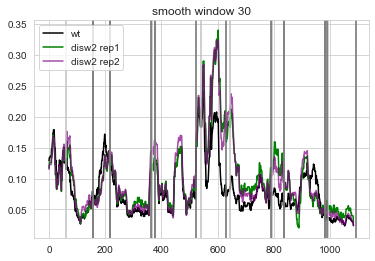

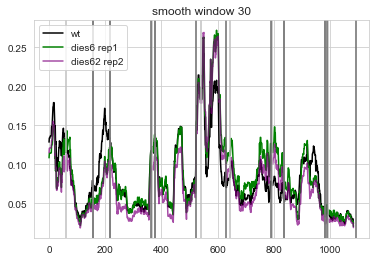

In [266]:
# How does that look over the whole sequence?
smooth_width = 30

sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(pooled_wt, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(disw2_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "green", label = "disw2 rep1")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(disw2_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "purple", alpha = 0.7, label = "disw2 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(pooled_wt, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(dies6_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "green", label = "dies6 rep1")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(dies6_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "purple", alpha = 0.7, label = "dies62 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

### Normalize part of the ARS305 sequence to part of the naked plasmid 

bases 4083 -4792 in the naked plasmid correspond to 
223 -932 in ARS305

they contain: L-1, NS-1, ARS305, NS+1, L+1 and a part of NS+2

In [327]:
#subset the overlap in between the sequences

overlap_ARS305_wt3 = ARS305_wt[:, 222:931]
overlap_plasmid_wt3 = wt_rep3_naked_plasmid[:, 4082:4791]
overlap_plasmid_wt2 = wt_rep2_naked_plasmid[:, 4082:4791]

overlap_ARS305_dies6_1 = ARS305_dies6_rep1[:, 222:931]
overlap_ARS305_dies6_2 = ARS305_dies6_rep2[:, 222:931]
overlap_ARS305_disw2_1 = ARS305_disw2_rep1[:, 222:931]
overlap_ARS305_disw2_2 = ARS305_disw2_rep2[:, 222:931]

<AxesSubplot:>

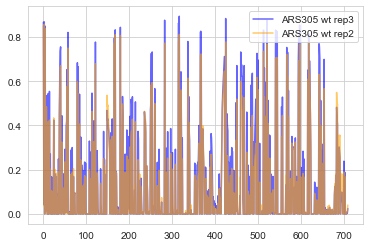

In [302]:
#sns.lineplot(x = range(overlap_ARS305.shape[1]), y = overlap_ARS305.mean(axis = 0), 
 #            color = "black", label = "ARS305 wt rep3")
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), y = overlap_plasmid_wt3.mean(axis = 0), 
             color = "blue", label = "ARS305 wt rep3", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), y = overlap_plasmid_wt2.mean(axis = 0), 
             color = "orange", label = "ARS305 wt rep2", alpha = 0.6)

In [294]:
overlap_plasmid_wt_joined = np.concatenate((overlap_plasmid_wt3, overlap_plasmid_wt2), axis = 0).mean(axis=0)

Text(0.5, 1.0, 'Mean values before normalization')

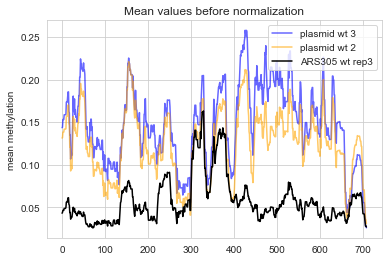

In [303]:
N=30


sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_plasmid_wt3.mean(axis = 0), np.ones(N)/N, mode ="same"), 
             color = "blue", label = "plasmid wt 3", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_plasmid_wt2.mean(axis = 0), np.ones(N)/N, mode ="same"), 
             color = "orange", label = "plasmid wt 2", alpha = 0.6)
#sns.lineplot(x = range(overlap_ARS305.shape[1]), 
#             y = np.convolve(overlap_plasmid_wt_joined, np.ones(N)/N, mode ="same"), 
#             color = "darkgreen", label = "joined plasmids", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_ARS305_wt3.mean(axis = 0), np.ones(N)/N, mode ="same"), 
             color = "black", label = "ARS305 wt rep3")
plt.ylabel("mean methylation")
plt.title("Mean values before normalization")

Text(0.5, 1.0, 'Max normalized wt samples')

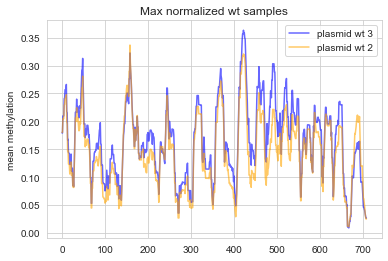

In [374]:
overlap_wt3_maxnorm = wt_rep3_naked_plasmid[:, 4082:4791].mean(axis=0)/wt_rep3_naked_plasmid[:, 4082:4791].mean(axis=0).max()
overlap_wt2_maxnorm = wt_rep2_naked_plasmid[:, 4082:4791].mean(axis=0)/wt_rep2_naked_plasmid[:, 4082:4791].mean(axis=0).max()

sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_wt3_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "blue", label = "plasmid wt 3", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_wt2_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "orange", label = "plasmid wt 2", alpha = 0.6)
plt.ylabel("mean methylation")
plt.title("Max normalized wt samples")

Text(0.5, 1.0, 'Max normalized samples averaged by condition')

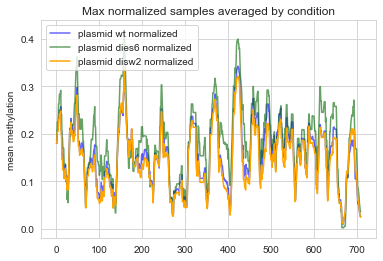

In [375]:
#before normalization, max-scale replicates, pool and average
#samples of ARS305 will be normalized to the respective conditions

overlap_wt_maxnorm = np.concatenate((overlap_wt3_maxnorm.reshape(-1, 709),
                                     overlap_wt2_maxnorm.reshape(-1, 709)), axis = 0).mean(axis=0)

overlap_dies61_maxnorm = dies6_rep1_naked[:, 4082:4791].mean(axis=0)/dies6_rep1_naked[:, 4082:4791].mean(axis=0).max()
overlap_dies62_maxnorm = dies6_rep2_naked[:, 4082:4791].mean(axis=0)/dies6_rep2_naked[:, 4082:4791].mean(axis=0).max()
overlap_dies6_maxnorm = np.concatenate((overlap_dies61_maxnorm.reshape(-1, 709),
                                     overlap_dies62_maxnorm.reshape(-1, 709)), axis = 0).mean(axis=0)

overlap_disw21_maxnorm = disw2_rep1_naked[:, 4082:4791].mean(axis=0)/disw2_rep1_naked[:, 4082:4791].mean(axis=0).max()
overlap_disw22_maxnorm = disw2_rep2_naked[:, 4082:4791].mean(axis=0)/disw2_rep2_naked[:, 4082:4791].mean(axis=0).max()
overlap_disw2_maxnorm = np.concatenate((overlap_disw21_maxnorm.reshape(-1, 709),
                                     overlap_disw22_maxnorm.reshape(-1, 709)), axis = 0).mean(axis=0)

sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_wt_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "blue", label = "plasmid wt normalized", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_dies6_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "darkgreen", label = "plasmid dies6 normalized", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_wt2_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "orange", label = "plasmid disw2 normalized")
plt.ylabel("mean methylation")
plt.title("Max normalized samples averaged by condition")

In [378]:

#norm_overlap_ARS305_wt3 = (overlap_ARS305_wt3.mean(axis=0)+ 0.01)/(overlap_plasmid_wt3.mean(axis=0)+0.01)

#norm_overlap_ARS305_dies6_rep1 = (overlap_ARS305_dies6_1.mean(axis=0)+ 0.01)/(overlap_plasmid_wt3.mean(axis=0)+0.01)

norm_overlap_ARS305_wt3 = (overlap_ARS305_wt3.mean(axis=0)+ 0.01)/(overlap_wt_maxnorm+0.01)
norm_overlap_ARS305_dies6_rep1 = (overlap_ARS305_dies6_1.mean(axis=0)+ 0.01)/(overlap_dies6_maxnorm+0.01)
norm_overlap_ARS305_disw2_rep1 = (overlap_ARS305_disw2_1.mean(axis=0)+ 0.01)/(overlap_disw2_maxnorm+0.01)

In [381]:
overlap_ARS305_wt3.shape[1]
np.convolve(norm_overlap_ARS305_disw2_rep1, np.ones(N)/N, mode ="same").shape

(709,)

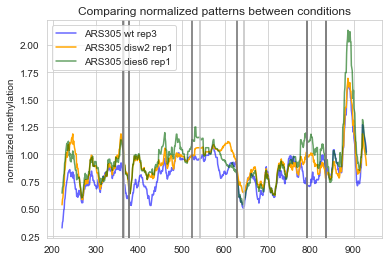

In [398]:
N=20

#sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
#             y = np.convolve(overlap_plasmid_wt3.mean(axis = 0), np.ones(N)/N, mode ="same"), 
#             color = "blue", label = "plasmid wt 3", alpha = 0.6)
#sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
#             y = np.convolve(overlap_ARS305_wt3.mean(axis = 0), np.ones(N)/N, mode ="same"), 
#             color = "black", label = "ARS305 wt rep3")
sns.lineplot(x = range(222,931), 
             y = np.convolve(norm_overlap_ARS305_wt3, np.ones(N)/N, mode ="same"), 
             color = "blue", label = "ARS305 wt rep3", alpha = 0.6)
sns.lineplot(x = range(222,931), 
             y = np.convolve(norm_overlap_ARS305_disw2_rep1, np.ones(N)/N, mode ="same"), 
             color = "orange", label = "ARS305 disw2 rep1")
sns.lineplot(x = range(222,931), 
             y = np.convolve(norm_overlap_ARS305_dies6_rep1, np.ones(N)/N, mode ="same"), 
             color = "darkgreen", label = "ARS305 dies6 rep1", alpha = 0.6)
plt.ylabel("normalized methylation")
plt.title("Comparing normalized patterns between conditions")

for border in ARS305_anno.loc[:, "pos_start"]:
    if 222 < border < 935:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 222 < border < 935:
        plt.axvline(border, color = "dimgray")


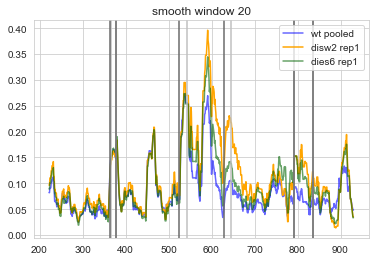

In [395]:
#Comparing to the normalization to maximum values per experiment

sns.lineplot(x = range(222,931), 
                 y = np.convolve(pooled_wt[222:931], np.ones(N)/N, mode ="same"),
             color = "blue", label = "wt pooled", alpha = 0.6)
sns.lineplot(x = range(222,931), 
                 y = np.convolve(disw2_rep1_minmax[222:931], np.ones(N)/N, mode ="same"),
             color = "orange", label = "disw2 rep1")
sns.lineplot(x = range(222,931), 
                 y = np.convolve(dies6_rep1_minmax[222:931], np.ones(N)/N, mode ="same"),
             color = "darkgreen", label = "dies6 rep1", alpha = 0.6)
plt.title("smooth window " + str(N))

for border in ARS305_anno.loc[:, "pos_start"]:
    if 222 < border < 935:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 222 < border < 935:
        plt.axvline(border, color = "dimgray")
    
plt.show()

In [397]:
ARS305_anno

,position,length,pos_start,pos_stop
0,,,,
NS-3,63..156,94,62,155
L-2,157..218,62,156,217
NS-2,219..365,147,218,364
L-1,366..378,13,365,377
NS-1,379..525,147,378,524
ARS305,543..630,88,542,629
NS+1,646..792,147,645,791
L+1,793..836,44,792,835
NS+2,837..983,147,836,982


### Experimental: Try clustering methods of scRNAseq

In [267]:
import scanpy

joined_wt.shape

(1495, 1084)